In [9]:
# adp 21회 3번 다항회귀 
# - 독립변수 하나, 종속변수 하나인 소규모 데이터
# - 다항회귀를 3차까지 적용하고 
# - 각 차수별 데이터 포인트 스캐터 플롯과 계수와 기울기 선 그리기 

In [1]:
### 적합한 데이터가 없어서 임의로 가공하여 분석용 데이터 준비 
### 원데이터 출처 https://wikidocs.net/80354

import pandas as pd

a = pd.read_csv('data/aaa_ML_salary.csv')
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


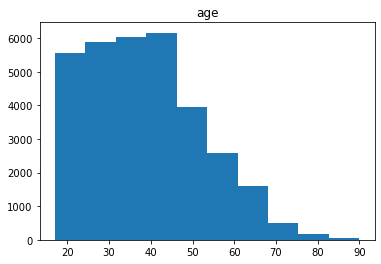

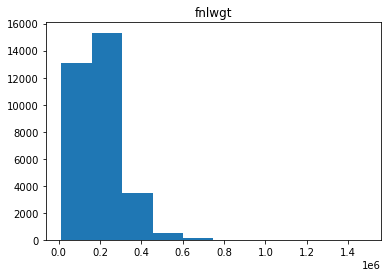

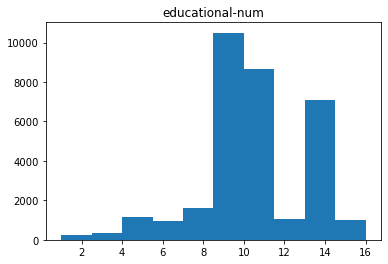

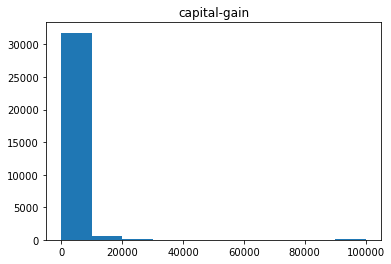

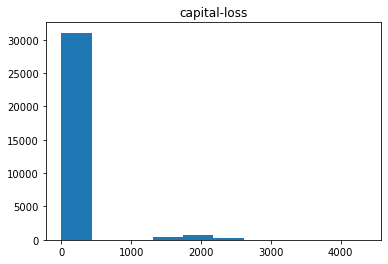

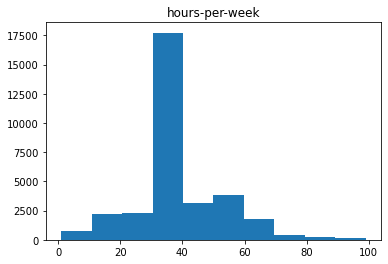

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for v in a.select_dtypes(include='int'):
    target = a[v]
    plt.hist(target)
    plt.title(v)
    plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'Xlabel'

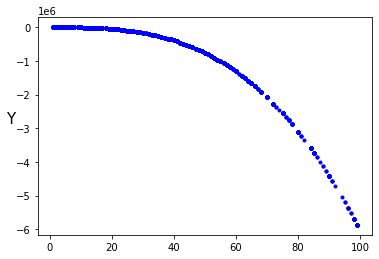

In [31]:
### 분석용 데이터 생성 (https://kimdingko-world.tistory.com/236)
### hours-per-week 기준으로 생성

import numpy as np
n=32561
noise = 10 * np.random.rand(n,1)

X = a[['hours-per-week']]
y = -6*X**3 - 5*X**2 - 2*X + 10 + noise  # 3차 방정식에 noise 추가

plt.plot(X,y,'b.')
plt.ylabel('Y', fontsize=15, rotation=0)
plt.Xlabel('X', fontsize=15)
plt.show()

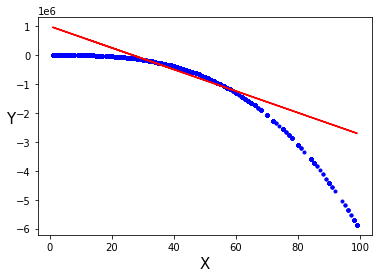

In [32]:
### 선형 회귀로 했을 경우

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

plt.plot(X, y, "b.")
plt.ylabel("Y", fontsize=15,rotation=0)
plt.xlabel("X", fontsize=15)
plt.plot(X_test, pred, 'r')
plt.show()

In [45]:
### 다항회귀 3차까지 적용
### -> polynomial regression 활용

from sklearn.preprocessing import PolynomialFeatures

# degree = 3 인 3차 다항식으로 X를 변환
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)



In [46]:
### train set 학습 및 예측결과 시각화

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([15.00360821]), array([[-2.00094301, -4.99999342, -5.9999998 ]]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


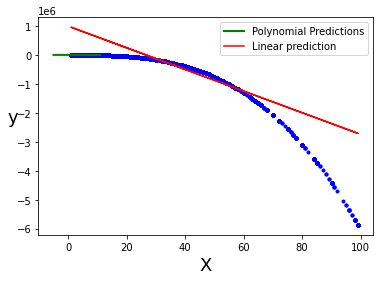

In [47]:
X_new=np.linspace(-5, 11, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)


plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, "g", linewidth=2, label="Polynomial Predictions")

plt.xlabel('X', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.plot(X_test, pred, 'r', label='Linear prediction')
plt.legend()
plt.show()

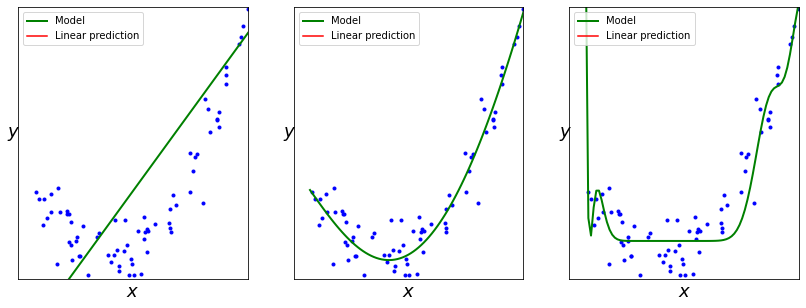

In [49]:
### 참고 - 다항회귀의 과소적합 / 과적합

### degree(차수)를 높게 지정할수록 학습 데이터에만 과적합되는 문제
### 예시 - 1,5,25차로 설정한 경우

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degrees = [1, 5, 25]
n = 100
X = -5 + 15 * np.random.rand(n,1)
noise = 10 * np.random.randn(n, 1)

y = 2*X**2 + 1*X + 10 + noise # 2차 방정식에 noise를 포함 (ax^2 + bx + c + noise)


plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # PolynomialFeatures 클래스를 이용해 피처를 다항식 피처로 변환
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    X_poly = poly_features.fit_transform(X)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    lin_reg.intercept_ , lin_reg.coef_

    X_new=np.linspace(-5, 11, 100).reshape(100, 1)
    X_new_poly = poly_features.transform(X_new)
    y_new = lin_reg.predict(X_new_poly)
    plt.plot(X, y, "b.")
    plt.plot(X_new, y_new, "g", linewidth=2, label="Model")
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.plot(X_test, pred, 'r', label="Linear prediction")
    plt.legend()
    plt.axis([-6, 8, 0, 150])
plt.show()

In [ ]:
### 위의 그래프에서 25차항은 지나치게 복잡한 모델로 
### 높은 변동성 보임 (고분산 high variance 문제)
### 1차항은 지나치게 단순화되어 한방향으로 치우친 경향 (고편향 high bias 문제)

### -> 편향 낮추고 분산 높이면서 
###    전체 오류가 가장 낮아지는 골디락스 지점을 찾는것이 중요